# Customizing Matplotlib: Configuration and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users. While much is slated to change in the 2.0 Matplotlib release, the ability to customize default settings helps bring the package in line with your own aesthetic preferences.

Here we'll wlak through some of Matplotlib's runtime configuration (`rc`) options, and take a look at the newer **stylesheets** features, which contains some nice sets of default configurations.

## Plot Customization by Hand

Throughout this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default. It's possible to do these customizations for each individual plot. For example, here is a fairly drab default histogram:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

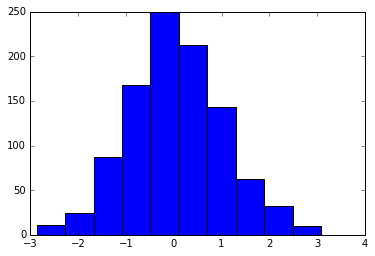

In [2]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

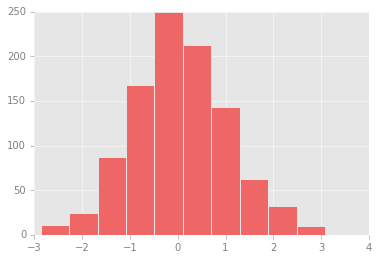

In [3]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by the look of the R language's `ggplot` visualization package. But this took a whole lot of effort! We definitely do not want to have to do all that tweaking each time we create a plot. Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: rcParams

Each time the Matplotlib loads, is defines a runtime configuration (`rc`) containing the default styles for every plot element you create. You can adjust this configuration at any time using the `plot.rc` convenience routine. Let's see what it looks like to modify the `rc` parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current `rcParams` dictionary, so we can easily reset these changes in the current session:

In [4]:
IPython_default = plt.rcParams.copy()

Now we can use the `plt.rc` function to change some of these settings:

In [5]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see out settings in action:

(array([ 11.,  24.,  87., 168., 250., 213., 143.,  62.,  32.,  10.]),
 array([-2.8672342 , -2.27187181, -1.67650943, -1.08114704, -0.48578466,
         0.10957773,  0.70494011,  1.3003025 ,  1.89566488,  2.49102727,
         3.08638966]),
 <a list of 10 Patch objects>)

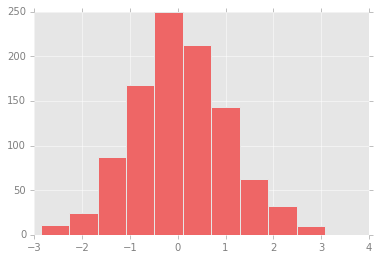

In [6]:
plt.hist(x)

Let's see what simple line plots look like with these `rc` parameters:

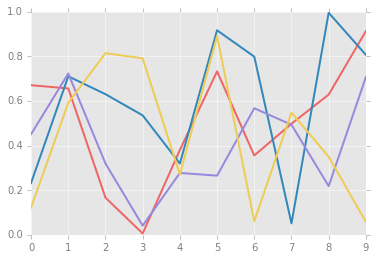

In [7]:
for i in range(4):
    plt.plot(np.random.rand(10))

I find this much more aestatically pleasing than the default styling. If you disagree with my aestatic sense, the good news is that you can adjust the `rc` parameters to suit your own tastes! These settings can be saved in a `.matplotlibrc` file, which you can read about in the Matplotlib library. That sais, I prefer to customize Matplotlib using its stylesheets instead.

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient `style` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the `.matplotlibrc` files mentioned earlier, but must be named with a `.mplstyle` extension.

Even if you don't create your own style, the stylesheets included by default are extremely useful. The available styles ar elisted in `plt.style.available` - here I'll list only the first five for brevity:

In [8]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

The basic way to switch to a stylesheet is to call:

In [9]:
# plt.style.use('stylename')

But keep in mind that this will change the style for the rest of the session! Alternatively, you can use the style context manager, which sets a style temporarily:

In [10]:
# with plt.style.context('stylename'):
#    make_a_plot()

Let's create a function that will make two bacsic types of plot:

In [12]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1,2,figsize(11,4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a','b','c'],loc='lower left')

We'll use this to explore how these plots look using the varius built-in styles.